In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Files supplied by the competition for model training
X_train = pd.read_csv('../../data/dengue_features_train.csv')
y_train = pd.read_csv('../../data/dengue_labels_train.csv', usecols=['total_cases'])

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [11]:
y_train['total_cases']

0       4
1       5
2       4
3       3
4       6
       ..
1451    5
1452    8
1453    1
1454    1
1455    4
Name: total_cases, Length: 1456, dtype: int64

In [69]:
df = pd.merge(X_train, y_train, left_index=True, right_index=True)
df['week_start_date'] = pd.to_datetime(df['week_start_date'])
df.set_index('week_start_date', inplace=True)
series = df[df['city']=='sj']['total_cases']
df.index = pd.to_datetime(df.index)
series.index

DatetimeIndex(['1990-04-30', '1990-05-07', '1990-05-14', '1990-05-21',
               '1990-05-28', '1990-06-04', '1990-06-11', '1990-06-18',
               '1990-06-25', '1990-07-02',
               ...
               '2008-02-19', '2008-02-26', '2008-03-04', '2008-03-11',
               '2008-03-18', '2008-03-25', '2008-04-01', '2008-04-08',
               '2008-04-15', '2008-04-22'],
              dtype='datetime64[ns]', name='week_start_date', length=936, freq=None)

<AxesSubplot:xlabel='week_start_date'>

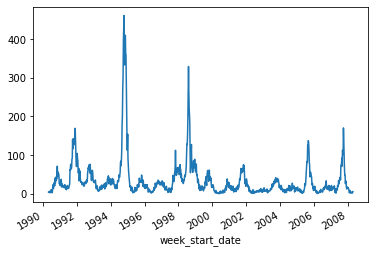

In [70]:
series.plot()

In [71]:
type(series)

pandas.core.series.Series

In [80]:
series.index = series.index.to_period('M')

AttributeError: 'PeriodIndex' object has no attribute 'to_period'

In [82]:
python_decomposition = sm.tsa.seasonal_decompose(series, freq=52)

<ipython-input-82-10ab85d3ae26>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  python_decomposition = sm.tsa.seasonal_decompose(series, freq=52)


In [83]:
def plot_seasonal_decomposition(axs, series, sd):
    axs[0].plot(series.index, series)
    axs[0].set_title("Raw Series")
    axs[1].plot(series.index, sd.trend)
    axs[1].set_title("Trend Component $T_t$")
    axs[2].plot(series.index, sd.seasonal)
    axs[2].set_title("Seasonal Component $S_t$")
    axs[3].plot(series.index, sd.resid)
    axs[3].set_title("Residual Component $R_t$")

TypeError: float() argument must be a string or a number, not 'Period'

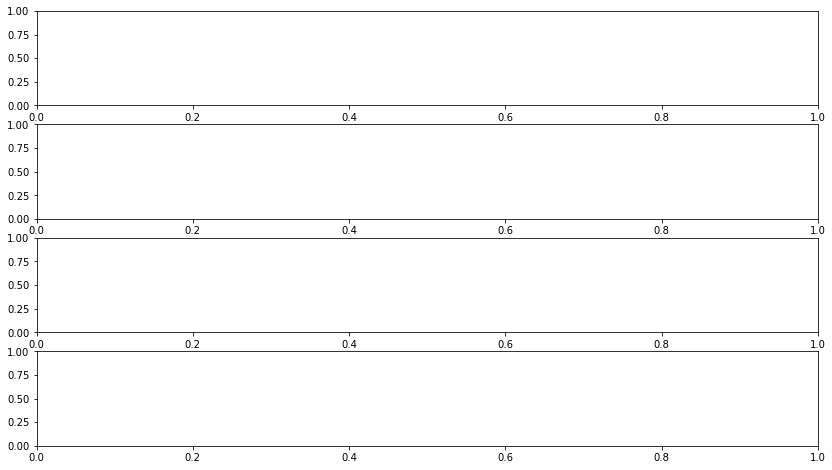

In [84]:
fig, axs = plt.subplots(4, figsize=(14, 8))
plot_seasonal_decomposition(axs, series, python_decomposition)
plt.tight_layout()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

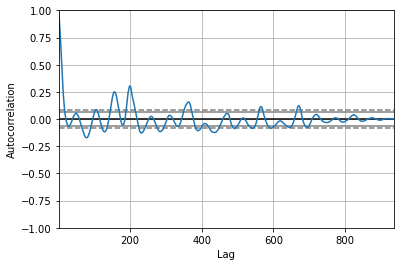

In [39]:
pd.plotting.autocorrelation_plot(series)

In [48]:
diff_1 = series.diff()[1:] 

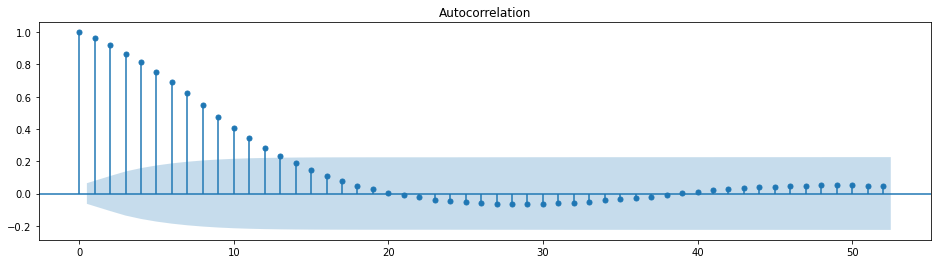

In [52]:
fig, ax = plt.subplots(1, figsize=(16, 4))
_ = sm.graphics.tsa.plot_acf(series,lags=1*52, ax=ax)

Let's start with picking the longest significant lag